In [0]:
!wget https://www.dropbox.com/s/6fab2uqje8e5bf5/stock_data.csv

--2019-01-04 05:48:13--  https://www.dropbox.com/s/6fab2uqje8e5bf5/stock_data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/6fab2uqje8e5bf5/stock_data.csv [following]
--2019-01-04 05:48:13--  https://www.dropbox.com/s/raw/6fab2uqje8e5bf5/stock_data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce517c10fd655eed4d393f3fd66.dl.dropboxusercontent.com/cd/0/inline/AYvmD-eJiN-yAP6GDyus8JrwgSdjDCVvN5jF7XhRlwb5RT97Qwo2fps6qhaIfQGa4beKlLXwaVDdS8Q8VintPed_uIbMQMcaCjybbtmZQ5y0lSpsESRv2J1yoDcDm7kcQtaMRtIWW3EZpJKkYrlNLwFOABJd66fYSGFxdVQrUgLpavVYbwCkENLtbg8J3ZIUNao/file [following]
--2019-01-04 05:48:13--  https://uce517c10fd655eed4d393f3fd66.dl.dropboxusercontent.com/cd/0/inline/AYvmD-eJiN-yAP6GDyus8JrwgSdjDCVvN5jF7XhRlw

In [0]:
import pandas as pd
data2 = pd.read_csv('/content/stock_data.csv')

In [0]:
x= []
y = []
for i in range(data2.shape[0]-5):
 x.append(data2.loc[i:(i+4)]['Close'].values)
 y.append(data2.loc[i+5]['Close'])

In [0]:
import numpy as np
x = np.array(x)
y = np.array(y)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=10)

In [0]:
from keras.layers import Dense
from keras.models import Sequential, Model
model = Sequential()
model.add(Dense(100, input_dim = 5, activation = 'relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               600       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose = 1)

Train on 1579 samples, validate on 677 samples
Epoch 1/100
1579/1579 [==============================] - 2s 1ms/step - loss: 133650.8578 - val_loss: 1510.8221
Epoch 2/100
1579/1579 [==============================] - 0s 71us/step - loss: 3386.9168 - val_loss: 1551.8139
Epoch 3/100
1579/1579 [==============================] - 0s 77us/step - loss: 646.6516 - val_loss: 546.1717
Epoch 4/100
1579/1579 [==============================] - 0s 71us/step - loss: 451.7747 - val_loss: 476.3091
Epoch 5/100
1579/1579 [==============================] - 0s 74us/step - loss: 441.2901 - val_loss: 455.9048
Epoch 6/100
1579/1579 [==============================] - 0s 69us/step - loss: 436.7432 - val_loss: 458.0513
Epoch 7/100
1579/1579 [==============================] - 0s 72us/step - loss: 437.3226 - val_loss: 454.5097
Epoch 8/100
1579/1579 [==============================] - 0s 70us/step - loss: 439.4474 - val_loss: 452.7269
Epoch 9/100
1579/1579 [==============================] - 0s 70us/step - loss: 437.51

In [0]:
from bs4 import BeautifulSoup
import urllib, json

In [0]:
dates = []
titles = []
for i in range(100):
  try:
    url = 'https://content.guardianapis.com/search?from-date=2010-01-01&section=business&page-size=200&order-by=newest&page='+str(i+1)+'&q=amazon&api-key=207b6047-a2a6-4dd2-813b-5cd006b780d7'
    response = urllib.request.urlopen(url)
    encoding = response.info().get_content_charset('utf8')
    data = json.loads(response.read().decode(encoding))
    print(i)
    for j in range(len(data['response']['results'])):
      dates.append(data['response']['results'][j]['webPublicationDate'])
      titles.append(data['response']['results'][j]['webTitle'])  
  except:
    break

0
1
2
3
4
5
6


In [0]:
import pandas as pd
data = pd.DataFrame(dates, titles)

In [0]:
data = data.reset_index()
data.columns = ['title','date']

In [0]:
data['date']=data['date'].str[:10]

In [0]:
data['date']=pd.to_datetime(data['date'], format = '%Y-%m-%d')

In [0]:
data = data.sort_values(by='date')

In [0]:
data_final = data.groupby('date').first().reset_index()

In [0]:
data2['Date'] = pd.to_datetime(data2['Date'],format='%Y-%m-%d')

In [0]:
data3 = pd.merge(data2,data_final, left_on = 'Date', right_on = 'date', how='left')

In [0]:
data2.shape

(2261, 7)

In [0]:
data3.shape

(2261, 9)

In [0]:
import nltk
import re
nltk.download('stopwords')
stop = nltk.corpus.stopwords.words('english')
def preprocess(text):
    text = str(text)
    text=text.lower()
    text=re.sub('[^0-9a-zA-Z]+',' ',text)
    words = text.split()
    words2=[w for w in words if (w not in stop)]
    #words3=[ps.stem(w) for w in words]
    words4=' '.join(words2)
    return(words4)
data3['title'] = data3['title'].apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
data3['title']=np.where(data3['title'].isnull(),'-','-'+data3['title'])

In [0]:
docs = data3['title'].values

In [0]:
from collections import Counter
counts = Counter()
for i,review in enumerate(docs):
  counts.update(review.split())
words = sorted(counts, key=counts.get, reverse=True)
vocab_size=len(words)
word_to_int = {word: i for i, word in enumerate(words, 1)}
encoded_docs = []
for doc in docs:
  encoded_docs.append([word_to_int[word] for word in doc.split()])

In [0]:
docs.shape

(2261,)

In [0]:
vocab_size

2405

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=vocab_size):
     results = np.zeros((len(sequences), dimension+1))
     for i, sequence in enumerate(sequences):
         results[i, sequence] = 1.
     return results

In [0]:
vectorized_docs = vectorize_sequences(encoded_docs)

In [0]:
vectorized_docs.shape

(2261, 2406)

In [1]:
from keras.layers import Dense, Input
from keras import Model
import keras.backend as K

Using TensorFlow backend.


In [2]:
input1 = Input(shape=(2406,))
model = (Dense(100, activation='relu'))(input1)
model = (Dense(1, activation='tanh'))(model)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
input2 = Input(shape=(5,))
model2 = (Dense(100, activation='relu'))(input2)
model2 = (Dense(1, activation='linear'))(model2)

In [0]:
from keras.layers import multiply
out = multiply([model, model2])

In [5]:
model = Model([input1, input2], out)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 2406)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 5)            0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          240700      input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 100)          600         input_2[0][0]                    
__________________________________________________________________________________________________
dense_2 (D

In [6]:
!apt install graphviz
!pip install pydot pydot-ng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [0]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import plot_model

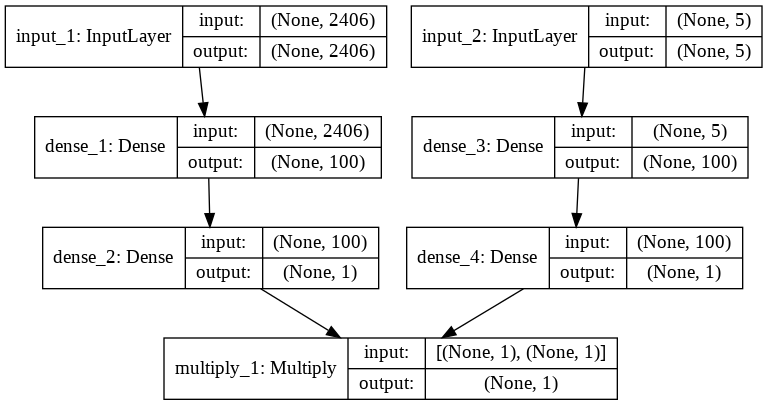

In [8]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [0]:
x1 = np.array(x)
x2 = np.array(vectorized_docs[5:])
y = np.array(y)

In [0]:
print(x1.shape, x2.shape, y.shape)

(2256, 5) (2256, 2406) (2256,)


In [0]:
X1_train = x1[:2100,:]
X2_train = x2[:2100, :]
y_train = y[:2100]

X1_test = x1[2100:,:]
X2_test = x2[2100:,:]
y_test = y[2100:]

In [0]:
print(X1_test.shape, X2_test.shape, y_test.shape)

(156, 5) (156, 2406) (156,)


In [0]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])

In [0]:
model.fit(x=[X2_train, X1_train], y=y_train, epochs=400,batch_size = 32, validation_data = ([X2_test, X1_test], y_test))

Train on 2100 samples, validate on 156 samples
Epoch 1/400
2100/2100 [==============================] - 0s 205us/step - loss: 82.9811 - acc: 0.0019 - val_loss: 5740.7854 - val_acc: 0.0000e+00
Epoch 2/400
2100/2100 [==============================] - 0s 200us/step - loss: 83.9892 - acc: 0.0014 - val_loss: 5148.0213 - val_acc: 0.0000e+00
Epoch 3/400
2100/2100 [==============================] - 0s 202us/step - loss: 90.1018 - acc: 0.0038 - val_loss: 4459.2365 - val_acc: 0.0000e+00
Epoch 4/400
2100/2100 [==============================] - 0s 183us/step - loss: 97.0022 - acc: 0.0014 - val_loss: 4608.7379 - val_acc: 0.0000e+00
Epoch 5/400
2100/2100 [==============================] - 0s 213us/step - loss: 109.7494 - acc: 0.0019 - val_loss: 4663.9670 - val_acc: 0.0000e+00
Epoch 6/400
2100/2100 [==============================] - 0s 186us/step - loss: 147.1527 - acc: 4.7619e-04 - val_loss: 4358.9167 - val_acc: 0.0000e+00
Epoch 7/400
2100/2100 [==============================] - 0s 192us/step - loss